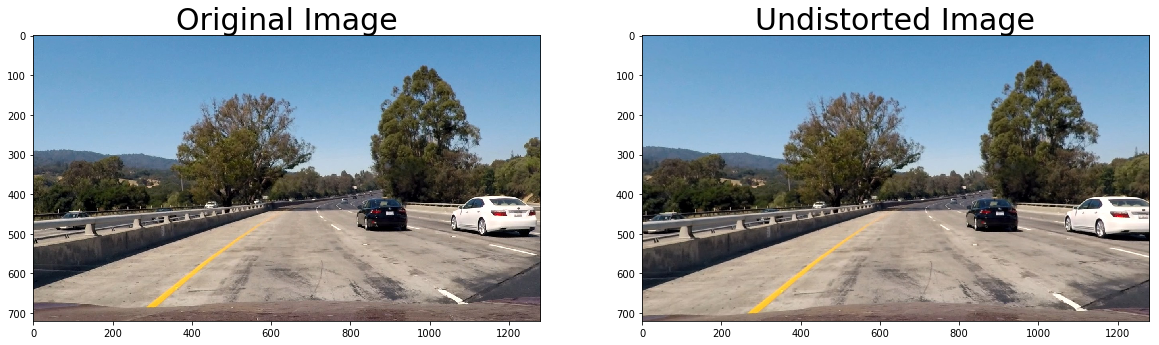

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import pickle
%matplotlib inline

#reading in an image
#image = mpimg.imread('camera_cal/calibration1.jpg')

def camera_calibration(directory_of_chessboard_images, parameter_output_directory, pattern_size):
    
    # Defining the object points of the chessboard:
    objp = np.zeros((pattern_size[0]*pattern_size[1],3), np.float32)
    objp[:,:2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1,2)
    
    # Array of object and image points that will be populated after running the chessboard detection.
    # These will be used to compute the camera matrix and the distortion coefficients
    object_points = []
    image_points = []
    
    # Loop over each file in the calibration directory
    for file in os.listdir(directory_of_chessboard_images):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"): 
             image = mpimg.imread(os.path.join(directory_of_chessboard_images, filename))
             gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
             found_chessboard, corners = cv2.findChessboardCorners(gray, pattern_size)
            
             # Skipping if no chessboard was found
             if found_chessboard:
                #cv2.drawChessboardCorners(image, pattern_size, corners, found_chessboard)
                corners = cv2.cornerSubPix(image[...,1],corners,(11,11),(-1,-1),criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)) 
                image_points.append(corners)
                object_points.append(objp)
        
                
    retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, (image.shape[1], image.shape[0]), None, None)
    
    # Save the camera calibration results for later use 
    dist_pickle = {}
    dist_pickle["cameraMatrix"] = cameraMatrix
    dist_pickle["distCoeffs"] = distCoeffs
    pickle.dump( dist_pickle, open( parameter_output_directory, "wb" ) )
    

camera_calibration('camera_cal',"./camera_dist_pickle.p", pattern_size=(6, 9))

#Loading and testing the saved calibration parameters:
pickle_in = open("./camera_dist_pickle.p","rb")
calibrationDict = pickle.load(pickle_in)
cameraMatrix = calibrationDict["cameraMatrix"]
distCoeffs = calibrationDict["distCoeffs"]

image = mpimg.imread("./camera_cal/calibration1.jpg")
dst = cv2.undistort(image, cameraMatrix, distCoeffs, None, cameraMatrix)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.savefig("./output_images/undistort_output.png")